# COVID ANALYSIS WEST AFRICA

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime
import seaborn as sns

In [4]:
# view all columns and rows
#pd.set_option( 'display.max_columns', None )
# pd.set_option( 'display.max_rows', None )

In [5]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series'

# get dataframes
confirmed = pd.read_csv( f'{url}/time_series_covid19_confirmed_global.csv', usecols=lambda columns:columns not in['Province/State', 'Lat', 'Long'])
deaths = pd.read_csv( f'{url}/time_series_covid19_deaths_global.csv', usecols=lambda columns:columns not in['Province/State', 'Lat', 'Long'] )
recovered = pd.read_csv( f'{url}/time_series_covid19_recovered_global.csv', usecols=lambda columns:columns not in['Province/State', 'Lat', 'Long'])

In [6]:
west_africa = ['Benin', 'Burkina Faso', "Cote d'Ivoire", 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Liberia', 'Mali', 'Niger', 'Nigeria', 'Senegal', 'Sierra Leone', 'Togo']
#countries = ['Ghana', 'Burkina Faso', "Cote d'Ivoire", 'Nigeria']

In [7]:
def w_data(df):
    
    assert isinstance( df, pd.DataFrame)
    
    df.rename( columns={'Country/Region': 'country'}, inplace=True)
    df = df[df['country'].isin(west_africa)]
    df.set_index('country', inplace=True)
    
    df.columns = pd.to_datetime( df.columns )
    df = df.transpose()
    df.reset_index(inplace=True)
    
    df.rename(columns={'index':'date'}, inplace=True)
    df= pd.melt(df, id_vars=['date'], value_vars=west_africa)
    df = df[(df['date'] > '2020-03-12') & (df['date'] <= datetime.today().strftime('%Y-%m-%d'))]
    
    assert isinstance( df, pd.DataFrame )  # check to ensure created obj is a dataframe
    return df

In [8]:
confirmed1 = w_data(confirmed)
confirmed1.rename(columns={'value':'confirmed'}, inplace=True)

recovered1 = w_data(recovered)
recovered1.rename(columns={'value':'recovered'}, inplace=True)

deaths1 = w_data(deaths)
deaths1.rename(columns={'value':'dead'}, inplace=True)

In [9]:
data = pd.concat([confirmed1, deaths1, recovered1],axis=1)#.reset_index(drop=True)
data.columns = ['date','country','confirmed','dates1','country1','dead','dates2', 'country2','recovered']
data.drop(['dates1', 'dates2', 'country1','country2'], inplace =True,axis=1)
datagroup = data.groupby('country')

In [10]:
data

,date,country,confirmed,dead,recovered
51,2020-03-13,Benin,0,0,0
52,2020-03-14,Benin,0,0,0
53,2020-03-15,Benin,0,0,0
54,2020-03-16,Benin,1,0,0
55,2020-03-17,Benin,1,0,0
...,...,...,...,...,...
5287,2021-01-29,Togo,4922,76,4122
5288,2021-01-30,Togo,5041,77,4224
5289,2021-01-31,Togo,5074,77,4268
5290,2021-02-01,Togo,5092,79,4282


<ipython-input-11-cfb070b49934>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data['date'],rotation=45)
<ipython-input-11-cfb070b49934>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data['date'],rotation=45)
<ipython-input-11-cfb070b49934>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data['date'],rotation=45)
<ipython-input-11-cfb070b49934>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data['date'],rotation=45)
<ipython-input-11-cfb070b49934>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data['date'],rotation=45)
<ipython-input-11-cfb070b49934>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data['date'],rotation=45)
<ipython-input-11-cfb070b49934>:7: UserWarning: FixedForma

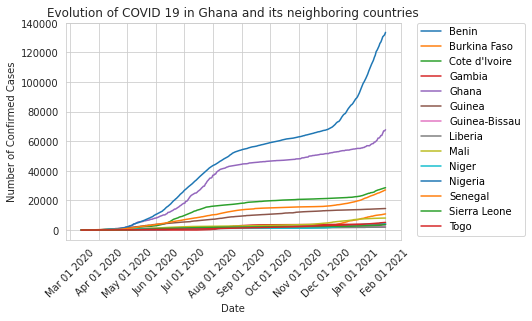

In [11]:
for key, data in datagroup:
    #print(key, data)
    with sns.axes_style('whitegrid'):
        ax = sns.lineplot(x=data['date'], y=data['confirmed'], label=key)

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    ax.set_xticklabels(data['date'],rotation=45)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d %Y'))
    ax.set_title('Evolution of COVID 19 in Ghana and its neighboring countries')
    ax.set(xlabel='Date', ylabel='Number of Confirmed Cases')  

<ipython-input-12-8801440d18c8>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data['date'],rotation=45)
<ipython-input-12-8801440d18c8>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data['date'],rotation=45)
<ipython-input-12-8801440d18c8>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data['date'],rotation=45)
<ipython-input-12-8801440d18c8>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data['date'],rotation=45)
<ipython-input-12-8801440d18c8>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data['date'],rotation=45)
<ipython-input-12-8801440d18c8>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data['date'],rotation=45)
<ipython-input-12-8801440d18c8>:6: UserWarning: FixedForma

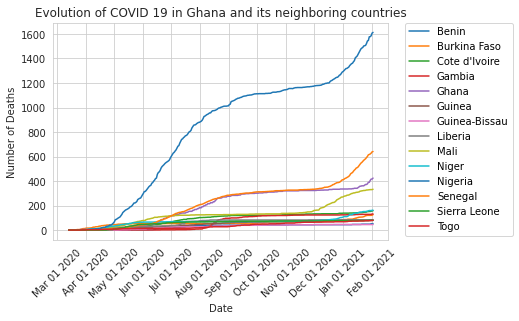

In [12]:
for key, data in datagroup:
    with sns.axes_style('whitegrid'):
        ax = sns.lineplot(x=data['date'], y=data['dead'], label=key)
        
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    ax.set_xticklabels(data['date'],rotation=45)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d %Y'))
    ax.set_title('Evolution of COVID 19 in Ghana and its neighboring countries')
    ax.set(xlabel='Date', ylabel='Number of Deaths')

<ipython-input-13-672bc8bff1d4>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data['date'],rotation=45)
<ipython-input-13-672bc8bff1d4>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data['date'],rotation=45)
<ipython-input-13-672bc8bff1d4>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data['date'],rotation=45)
<ipython-input-13-672bc8bff1d4>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data['date'],rotation=45)
<ipython-input-13-672bc8bff1d4>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data['date'],rotation=45)
<ipython-input-13-672bc8bff1d4>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data['date'],rotation=45)
<ipython-input-13-672bc8bff1d4>:6: UserWarning: FixedForma

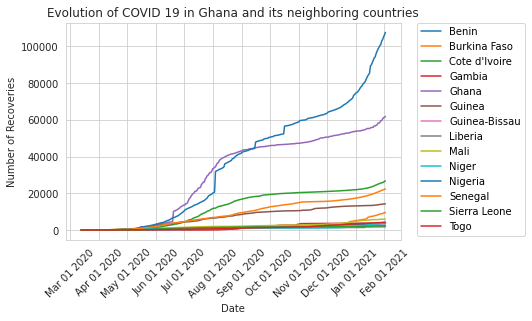

In [13]:
for key, data in datagroup:
    with sns.axes_style('whitegrid'):
        ax = sns.lineplot(x=data['date'], y=data['recovered'], label=key)
        
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    ax.set_xticklabels(data['date'],rotation=45)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d %Y'))
    ax.set_title('Evolution of COVID 19 in Ghana and its neighboring countries')
    ax.set(xlabel='Date', ylabel='Number of Recoveries')